#Analysis for Global University Rankings 2012-2015
By: Angela Deslandes

## Overview

*The Center for World University* Rankings provides information for top universities in the World. They use an overall rank per university and individual values for the National Rank, Quality of Education, Alumni Employment, Quality of Faculty, Publications, Influence, Citations, Broad Impact, Patents, and Total Score.

This dataset revolves around the assessment and comparison of universities globally throughout the years 2012-2015. This study is meant to provide insights into relationships between University Rankings, their quality of education, and the universities publications, among other features. The analysis will be able to shed light into what factors affect the overall ranking system for universities.

<br><br>

*Link to Data Source*:

https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

<br><br>

### Key Factors:
- **World Rank** - world rank for university
- **Institution** - name of university
- **Country** - country of each university
- **National Rank** - rank university within its country
- **Quality of Education** - rank for quality of education
- **Alumni Employment** - rank for alumni employment
- **Quality of Faculty** - rank for quality of faculty
- **Publications** - rank for publications
- **Influence** - rank for influence
- **Citations** - number of students at the university
- **Broad Impact** - rank for broad impact (only available for 2014 and 2015)
- **Patents** - rank for patents
- **Score** - total score, used for determining world rank
- **Year** - year of ranking (2012-2015)

<br>

### Goals:
- To evaluate the relationship between the overall score of universities and the quality of education.
- To evaluate the relationship between the number of publications for higher-ranked schools and lower-ranked schools.

# Importing

In [ ]:
# Connect to drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
from scipy import stats
import seaborn as sns
sns.set()
pd.set_option('display.max_colwidth', None)
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# reading in data from drive
df = pd.read_csv('/content/gdrive/My Drive/Thinkful/Capstone III/world-university-rankings.csv')
# print first 5 rows
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Cleaning & Exploring Data

In [ ]:
# rows, columns
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  2200
Number of columns:  14


In [ ]:
# check for nulls and verify dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [ ]:
# see descriptive statistics
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [ ]:
# how many universities in each year
df['year'].value_counts()

2014    1000
2015    1000
2012     100
2013     100
Name: year, dtype: int64

In [ ]:
# Finding the missing values
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

There are 200 missing values in the broad_impact column. Broad_impact values are not available for year 2014 and 2015. Also the mean and median are equal which means the data is normally distributed.

In [ ]:
median_value = df['broad_impact'] = df['broad_impact'].median()
df['broad_impact'].fillna(median_value, inplace=True)

In [ ]:
# Verifying missing values
df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [ ]:
# Checking for duplicates, there are none
df_doubles = df[df.duplicated()]
df_doubles.shape

(0, 14)

In [ ]:
df['country'].value_counts()

USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia        

<function matplotlib.pyplot.show(close=None, block=None)>

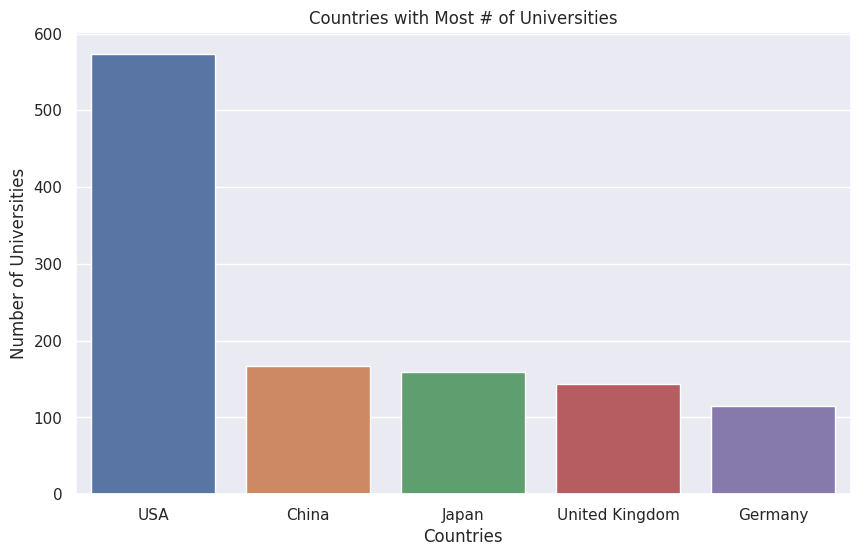

In [ ]:
mostschools = df.groupby('country').institution.count().sort_values(ascending=False).head()

ypoints =np.array(mostschools)
xpoints =np.array(mostschools.index)

plt.figure(figsize=(10,6))

sns.barplot(x=xpoints, y=ypoints)
sns.set_style("darkgrid")

plt.xlabel("Countries")
plt.ylabel("Number of Universities")
plt.title("Countries with Most # of Universities")

plt.show

In [ ]:
# Creating a correlation matrix
df.corr()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,NaN,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,NaN,0.159440,-0.199756,0.102951
quality_of_education,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,NaN,0.528120,-0.600541,0.427732
alumni_employment,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,NaN,0.528219,-0.510374,0.427710
quality_of_faculty,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,NaN,0.555107,-0.693540,0.484788
publications,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,NaN,0.671558,-0.522111,0.318245
influence,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,NaN,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,NaN,0.598728,-0.522438,0.328771
broad_impact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patents,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,NaN,1.000000,-0.474810,0.368570


In [ ]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [ ]:
# Created a subset of columns, excluding Date, No, and broad impact columns
sub = df[['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'patents',
       'score', 'year']]

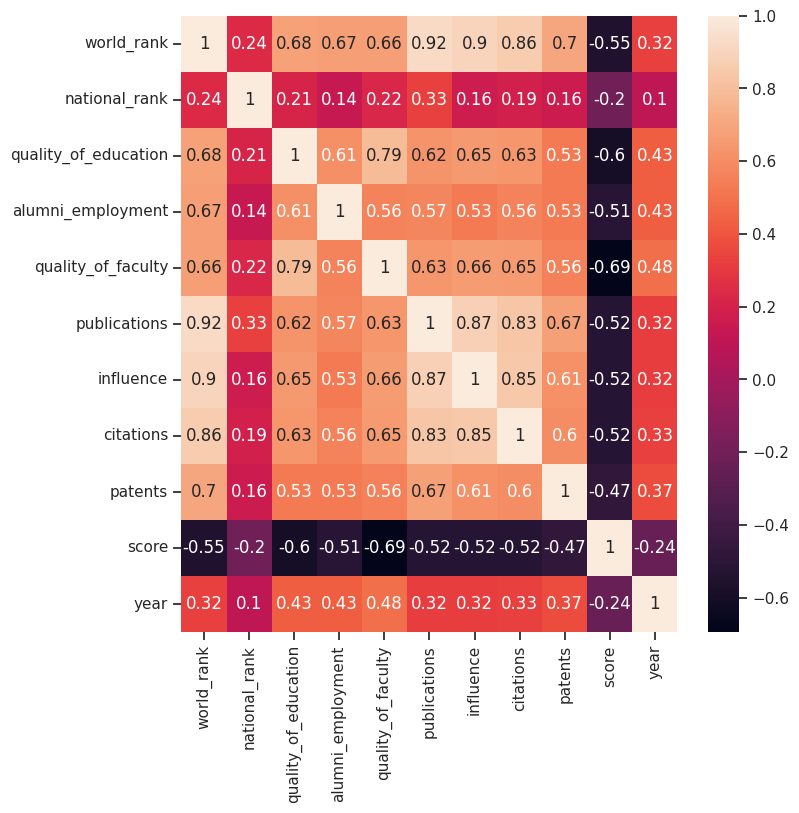

In [ ]:
# Subplot in matplotlib
f, ax = plt.subplots(figsize=(8, 8))

# Correlation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot=True, ax = ax)

In [ ]:
# Second subset of columns
sub_2 = sub[['world_rank', 'quality_of_education', 'publications', 'score', 'year']]

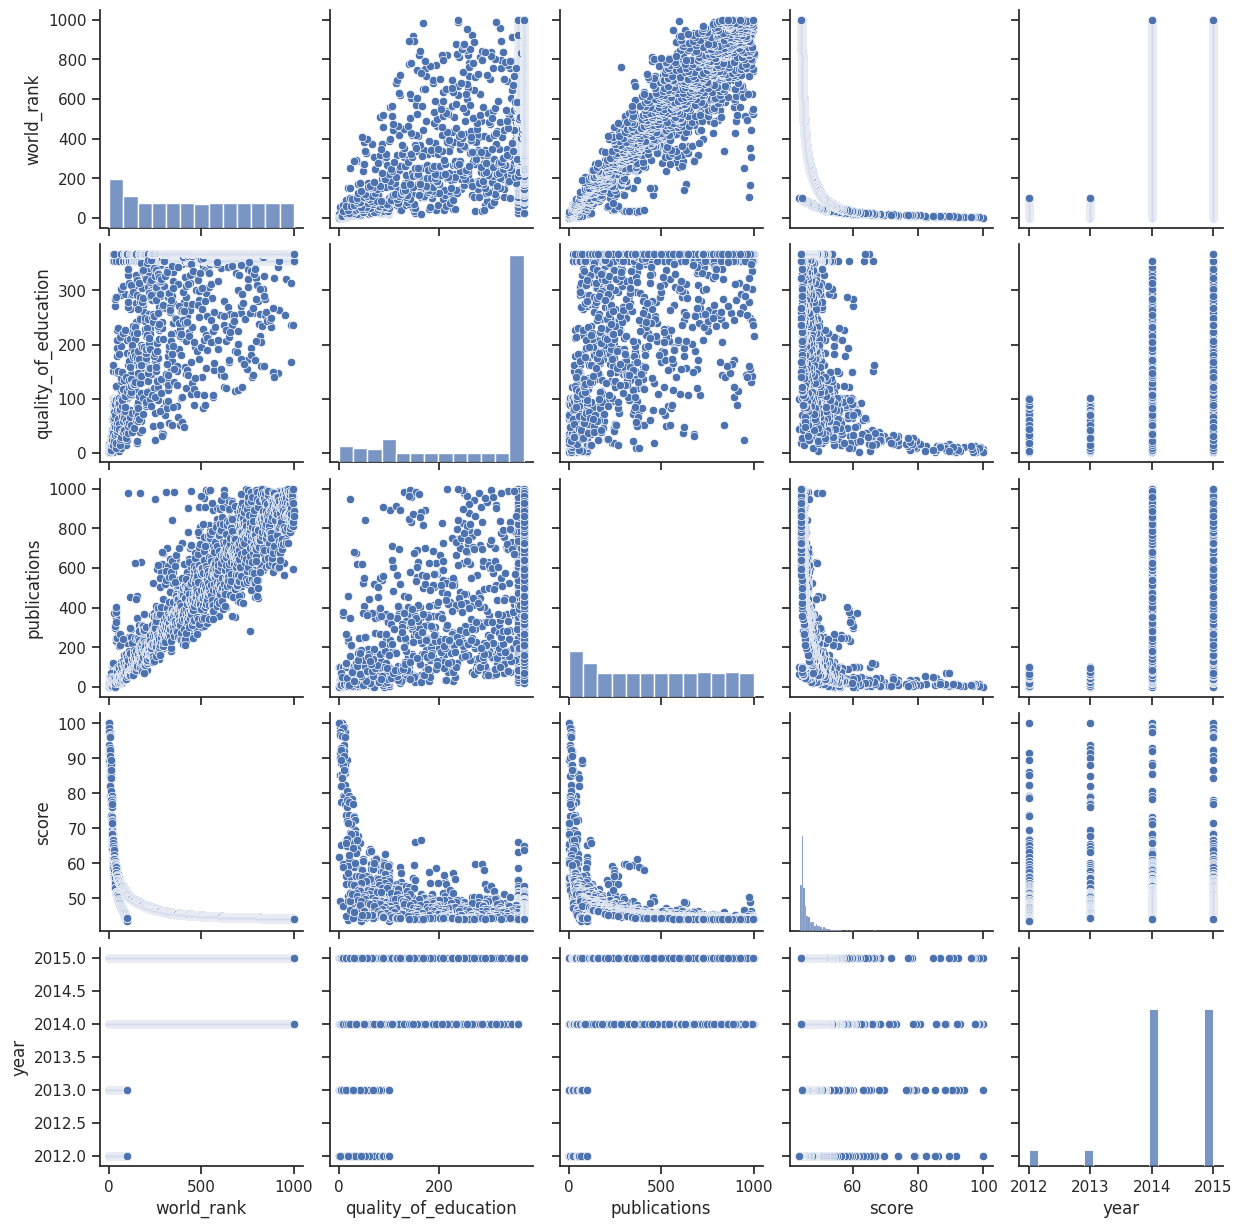

In [ ]:
# Pair plot
sns.pairplot(sub_2)

(Above) Almost all of the variables have positive relationships with each other except the score, which means the higher the score, the lower the rank.

<Axes: xlabel='score', ylabel='Count'>

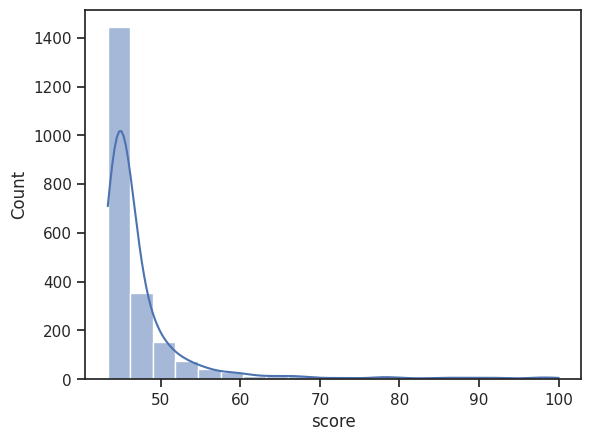

In [ ]:
sns.histplot(df['score'], bins = 20, kde = True)

# Hypotheses & T-tests

I would like to answer 2 questions using this data:

- The *first* is to investigate whether higher-ranked universities provide a better quality of education than lower ranked universities. This could suggest that students at higher-ranked universities tend to report higher levels of satisfaction with the quality of education.

- The *second* is to explore whether higher-ranked uiversities have a greater number of publications than lower-ranked universities. Statistical analysis might show a positive and significant correlation between the number of publications and university ranks. This would support the notion that higher-ranked universities have a greater research output.

I will test these hypotheses at a 95% significance level and expect correlation coefficients of at least 0.5 to confirm this.

## Hypothesis #1 (Quality of Education)
**Hypotheses:**
- Null Hypothesis (H0): There is no significant difference in the quality of education provided by higher-ranked and lower-ranked universities.
- Alternative Hypothesis (H1): Higher-ranked universities provide better quality education than lower-ranked universities.

In [ ]:
# Function to calculate with a 95% confidence interval
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()

    # Calculate the standard error and compute the confidence intervals.
    std_err_difference = math.sqrt((sample_1_var / sample_1_n) + (sample_2_var / sample_2_n))
    mean_difference = sample_2_mean - sample_1_mean
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error

    print("The difference in means at the 95% confidence interval is between " + str(ci_lower)+" and " + str(ci_upper))

In [ ]:
# Categorizing score levels
df.loc[df['score'] >= 85, 'Score Level'] = 'Excellent'
df.loc[(df['score'] >= 70) & (df['score'] < 85), 'Score Level'] = 'Good'
df.loc[(df['score'] >= 60) & (df['score'] < 70), 'Score Level'] = 'Satisfactory'
df.loc[(df['score'] >= 50) & (df['score'] < 60), 'Score Level'] = 'Poor'
df.loc[df['score'] < 50, 'Score Level'] = 'Weak'
df['Score Level'].value_counts(dropna = False)

Weak            1868
Poor             224
Satisfactory      46
Excellent         35
Good              27
Name: Score Level, dtype: int64

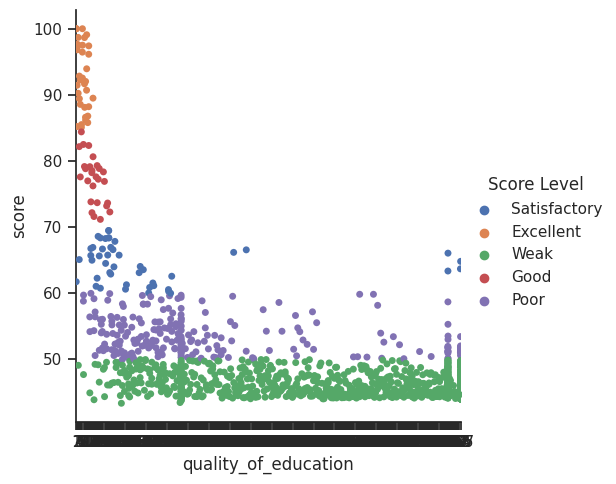

In [ ]:
sns.set(style="ticks")
g = sns.catplot(x="quality_of_education", y="score", hue="Score Level", data=df)

The graph above indicates a connection between the score and the quality of education; however, the score is influenced by factors beyond the quality of education alone. The plot suggests that while a moderate link exists between the score and education quality, it isn't a flawless correlation, and other elements are at play. For instance, certain universities with exceptional education quality might still have lower scores compared to other institutions, implying that additional factors impact a student's score beyond education quality. Consequently, while quality education is pivotal for a student's academic achievements, it's not the sole determinant, and other factors need to be taken into account as well.

In [ ]:
# Calling function to calculate 95% c.i. for score and quality of education
get_95_ci(df['quality_of_education'], df['score'])

The difference in means at the 95% confidence interval is between -232.40771266821292 and -222.19640551360527


The **difference in means**, which is negative and falls within a specific confidence interval, supports the idea that higher-ranked universities might indeed have a better quality of education compared to lower-ranked universities.

In [ ]:
df['quality_of_education'].corr(df['score'])

-0.6005406287207992

The **Pearson correlation coefficient** of approximately -0.60 suggests a moderate to strong negative linear correlation. This means that as the quality of education increases, the score tends to decrease.

In [ ]:
# Test for correlation
stats.pearsonr(df['quality_of_education'], df['score'])

PearsonRResult(statistic=-0.6005406287207994, pvalue=9.109501074270075e-216)

The very low **p-value** indicates that the observed correlation is statistically significant, providing evidence against the null hypothesis of no correlation.

## Summary of findings for hypothesis #1:

Given these findings, both the Pearson correlation coefficient and the difference in means at the confidence interval provide evidence that supports the alternative hypothesis (H1). Higher-ranked universities appear to provide better quality education than lower-ranked universities, and there is a negative relationship between the quality of education and the ranking scores.

Overall, we can reject the null hypothesis and conclude that there is a statistically significant difference between the two variables being tested.

## Hypothesis #2 (Number of Publications)
**Hypotheses:**
- Null Hypothesis (H0): There is no significant difference in the number of publications between higher-ranked and lower-ranked universities.
- Alternative Hypothesis (H1): Higher-ranked universities have a greater number of publications than lower-ranked universities.

<Axes: xlabel='score', ylabel='publications'>

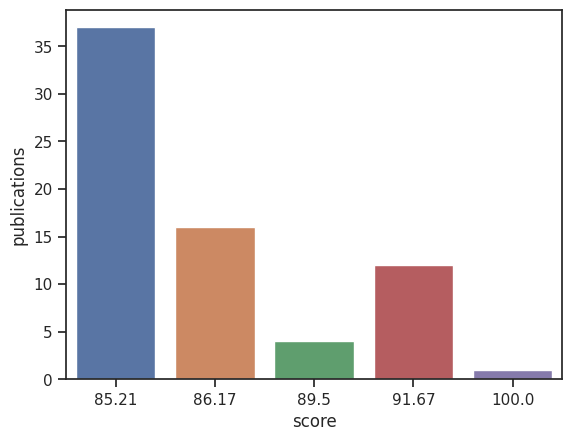

In [ ]:
sns.barplot(x = df['score'].head(5), y = df['publications'])

In [ ]:
# Calling function to calculate 95% c.i. for score and publications
get_95_ci(df['publications'], df['score'])

The difference in means at the 95% confidence interval is between -424.8077202901549 and -399.4127615280269


The **difference in means**, which is negative and falls within the confidence interval, goes *against* the alternative hypothesis (H1), that higher-ranked universities have a greater number of publications. The confidence interval suggests that the difference in the number of publications between higher-ranked and lower-ranked universities is negative, indicating that higher-ranked universities tend to have fewer publications than lower-ranked universities.

In [ ]:
df['publications'].corr(df['score'])

-0.5221113225385748

The **Pearson correlation coefficient** of approximately -0.52 has a very low p-value, indicating a statistically significant correlation between the two variables. This suggests a moderate *negative* relationship between the number of publications and the ranking of universities and implies that as the ranking of universities increases, the number of publications tends to decrease.

In [ ]:
# Test for correlation
stats.pearsonr(df['publications'], df['score'])

PearsonRResult(statistic=-0.522111322538575, pvalue=3.992902162220965e-154)

The very low **p-value** indicates that the observed correlation is statistically significant. This means that the observed correlation between the number of publications and university rankings is unlikely to have occurred by chance.

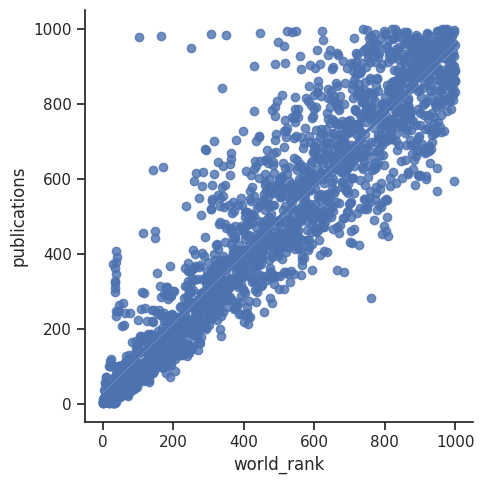

In [ ]:
# Scatterplot for the world rank and publications columns in seaborn
sns.lmplot(x = 'world_rank', y = 'publications', data = df)

As we can see above, there is a strong relationship between world rank and publication rank, which means the publication number strongly influences the world rank.

## Summary of findings for hypothesis #2:

Given that the calculated difference in means and the correlation coefficient both suggest a negative relationship between university ranking and the number of publications, the results do not support the alternative hypothesis (H1). Higher-ranked universities tend to have a lower number of publications than lower-ranked universities, and there is a negative relationship between the publications and the ranking scores. This conclusion is consistent with both the Pearson correlation coefficient and the calculated difference in means.

Overall, we can accept the null hypothesis and conclude that there is a statistically significant difference between the two variables being tested.

# Conclusion:

In conclusion, our comprehensive exploration of two key hypotheses related to university rankings has yielded valuable insights into the dynamics of higher education. For **Hypothesis #1**, the investigation into the relationship between university ranking scores and the quality of education has unearthed compelling evidence in favor of the alternative hypothesis (H1). Both the Pearson correlation coefficient and the calculated difference in means consistently point to the fact that higher-ranked universities tend to provide a superior quality of education compared to their lower-ranked counterparts. The negative correlation observed between educational quality and ranking scores underlines the significance of a robust education in shaping a university's standing. This robust evidence enables us to confidently reject the null hypothesis, affirming the pivotal role of education quality in the realm of university rankings.

Conversely, for **Hypothesis #2**, a meticulous analysis of the interplay between university ranking scores and the number of publications has revealed intriguing dynamics. The convergence of insights from both the calculated difference in means and the Pearson correlation coefficient reinforces the null hypothesis. This suggests that while the number of publications and university rankings do exhibit a negative correlation, the relationship is complex. Our acceptance of the null hypothesis underscores the idea that ranking outcomes may not be strictly governed by research output alone, hinting at the multifaceted nature of university excellence.

These findings collectively provide a nuanced understanding of the multifarious factors that contribute to the intricate world of university rankings. While the first hypothesis highlights the pivotal role of education quality in shaping rankings, the second hypothesis emphasizes the intricate interplay between research output and ranking outcomes. Such insights have far-reaching implications for educators, policymakers, and stakeholders in the higher education sector, facilitating informed decisions and discussions about the variables that truly define a university's global stature.